# Visualizing FordBikes Data 

## Karthick Pandi

### Table of Contents

<ul>
    <li> Introduction</li>
    <li> Data Gathering </li>
    <li> Data Assessing </li>
    <li> Data Cleaning </li>
    <li> Univariate Plots</li>
    <li> Bivariate Plots</li>
    <li> Multivariate Plots</li>
</ul>

### Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Preliminary Wrangling

### Data Gathering

In [1]:
import pandas as pd
import glob 
import os
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings
import numpy as np

I have downloaded the csv files from the website mannualy and stored in a folder named Untitled Folder.

In [2]:
all_files = glob.glob(os.path.join("Untitled Folder", "*.csv"))

In [3]:
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
df.to_csv('fordgobike.csv', index = False)


In [2]:
df = pd.read_csv('fordgobike.csv')


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,9,10,11,12,13,14,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Assessing

In [3]:
df.shape

(1297244, 24)

In [4]:
df.head()

,bike_id,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,ended_at,...,rideable_type,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
0,NaN,NaN,37.760000,-122.420000,NaN,NaN,NaN,NaN,NaN,2020-06-03 16:48:28,...,electric_bike,37.770000,-122.40000,NaN,NaN,NaN,NaN,NaN,2020-06-03 16:37:10,NaN
1,NaN,NaN,37.780000,-122.460000,NaN,NaN,NaN,NaN,NaN,2020-06-03 12:44:02,...,electric_bike,37.780000,-122.49000,NaN,NaN,NaN,NaN,NaN,2020-06-03 12:22:47,NaN
2,NaN,NaN,37.790000,-122.440000,NaN,NaN,NaN,NaN,NaN,2020-06-02 17:52:21,...,electric_bike,37.800426,-122.41095,487.0,NaN,NaN,Powell St at Columbus Ave,NaN,2020-06-02 17:37:43,NaN
3,NaN,NaN,37.770000,-122.430000,NaN,NaN,NaN,NaN,NaN,2020-06-02 18:48:30,...,electric_bike,37.760000,-122.41000,NaN,NaN,NaN,NaN,NaN,2020-06-02 18:13:01,NaN
4,NaN,NaN,37.772894,-122.509079,521.0,NaN,NaN,48th Ave at Cabrillo St,NaN,2020-06-03 16:06:10,...,electric_bike,37.769841,-122.42921,85.0,NaN,NaN,Church St at Duboce Ave,NaN,2020-06-03 15:16:06,NaN


In [5]:
df.tail()

,bike_id,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,ended_at,...,rideable_type,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
1297239,NaN,NaN,37.788189,-122.420524,419.0,NaN,NaN,Fern St at Polk St,NaN,2020-08-09 14:08:30,...,docked_bike,37.788189,-122.420524,419.0,NaN,NaN,Fern St at Polk St,NaN,2020-08-09 14:06:02,NaN
1297240,NaN,NaN,37.780645,-122.402866,321.0,NaN,NaN,Folsom St at 5th St,NaN,2020-08-26 17:13:40,...,docked_bike,37.773062,-122.439077,71.0,NaN,NaN,Broderick St at Oak St,NaN,2020-08-26 16:44:56,NaN
1297241,NaN,NaN,37.777053,-122.429558,55.0,NaN,NaN,Webster St at Grove St,NaN,2020-08-31 16:39:26,...,docked_bike,37.804770,-122.403234,6.0,NaN,NaN,The Embarcadero at Sansome St,NaN,2020-08-31 16:13:51,NaN
1297242,NaN,NaN,37.811377,-122.265192,181.0,NaN,NaN,Grand Ave at Webster St,NaN,2020-08-01 15:14:48,...,docked_bike,37.812744,-122.247215,193.0,NaN,NaN,Grand Ave at Santa Clara Ave,NaN,2020-08-01 15:04:57,NaN
1297243,NaN,NaN,37.791300,-122.399051,20.0,NaN,NaN,Mechanics Monument Plaza (Market St at Bush St),NaN,2020-08-07 20:06:49,...,docked_bike,37.773793,-122.421239,75.0,NaN,NaN,Market St at Franklin St,NaN,2020-08-07 19:44:44,NaN


In [6]:
df.sample(10)

,bike_id,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,ended_at,...,rideable_type,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
271588,10072.0,2103.0,NaN,NaN,36.0,37.783830,-122.398870,Folsom St at 3rd St,2020-03-09 08:44:35.2270,NaN,...,NaN,NaN,NaN,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2020-03-09 08:09:31.6600,NaN,Customer
514616,11717.0,24237.0,NaN,NaN,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2020-02-06 16:45:18.1370,NaN,...,NaN,NaN,NaN,267.0,37.861804,-122.253569,Derby St at College Ave,2020-02-06 10:01:20.2730,NaN,Subscriber
383644,591670.0,1500.0,NaN,NaN,NaN,37.802326,-122.400084,NaN,2020-03-01 16:09:38,NaN,...,NaN,NaN,NaN,NaN,37.783093,-122.392352,NaN,2020-03-01 15:44:37,NaN,Customer
1291877,NaN,NaN,37.780675,-122.400811,47.0,NaN,NaN,Clara St at 4th St,NaN,2020-08-01 14:29:40,...,docked_bike,37.760292,-122.418889,122.0,NaN,NaN,19th St at Mission St,NaN,2020-08-01 14:13:50,NaN
396354,153531.0,448.0,NaN,NaN,NaN,37.773457,-122.439179,NaN,2020-03-03 19:20:38,NaN,...,NaN,NaN,NaN,NaN,37.788680,-122.443171,NaN,2020-03-03 19:13:09,NaN,Subscriber
298181,12571.0,697.0,NaN,NaN,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2020-03-02 18:48:24.2620,NaN,...,NaN,NaN,NaN,81.0,37.775880,-122.393170,Berry St at 4th St,2020-03-02 18:36:46.8410,NaN,Customer
642648,926032.0,401.0,NaN,NaN,NaN,37.776209,-122.393118,NaN,2020-02-07 12:31:53,NaN,...,NaN,NaN,NaN,NaN,37.769445,-122.408261,NaN,2020-02-07 12:25:12,NaN,Subscriber
1050651,NaN,NaN,37.364015,-121.911909,392.0,NaN,NaN,Sonora Ave at 1st St,NaN,2020-07-15 13:41:11,...,electric_bike,37.360000,-121.910000,NaN,NaN,NaN,NaN,NaN,2020-07-15 13:37:21,NaN
1144261,NaN,NaN,37.790510,-122.432515,492.0,NaN,NaN,Webster St at Clay St,NaN,2020-07-18 10:11:08,...,electric_bike,37.777655,-122.433132,54.0,NaN,NaN,Alamo Square (Steiner St at Fulton St),NaN,2020-07-18 10:03:37,NaN
109199,NaN,NaN,37.340000,-121.890000,NaN,NaN,NaN,NaN,NaN,2020-06-12 18:45:02,...,electric_bike,37.340000,-121.900000,NaN,NaN,NaN,NaN,NaN,2020-06-12 18:39:50,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297244 entries, 0 to 1297243
Data columns (total 24 columns):
bike_id                    609153 non-null float64
duration_sec               609153 non-null float64
end_lat                    687053 non-null float64
end_lng                    687053 non-null float64
end_station_id             708835 non-null float64
end_station_latitude       609153 non-null float64
end_station_longitude      609153 non-null float64
end_station_name           709532 non-null object
end_time                   609153 non-null object
ended_at                   688091 non-null object
is_equity                  138251 non-null object
member_casual              688091 non-null object
rental_access_method       432112 non-null object
ride_id                    688091 non-null object
rideable_type              688091 non-null object
start_lat                  688091 non-null float64
start_lng                  688091 non-null float64
start_station_id           7

In [8]:
df.columns

Index(['bike_id', 'duration_sec', 'end_lat', 'end_lng', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'ended_at', 'is_equity', 'member_casual',
       'rental_access_method', 'ride_id', 'rideable_type', 'start_lat',
       'start_lng', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'start_station_name', 'start_time',
       'started_at', 'user_type'],
      dtype='object')

In [9]:
df.describe()

,bike_id,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude
count,609153.000000,609153.000000,687053.000000,687053.000000,708835.000000,609153.000000,609153.000000,688091.000000,688091.000000,719183.000000,609153.000000,609153.000000
mean,356779.129739,819.561811,37.726114,-122.346681,202.845026,37.745679,-122.353649,37.726157,-122.348618,207.491611,37.746342,-122.356376
std,304099.255058,1426.987690,0.153650,0.449651,164.353200,0.284268,0.842188,0.146684,0.176975,164.404605,0.229667,0.643771
min,12.000000,60.000000,0.000000,-122.559000,3.000000,0.000000,-122.575763,37.239200,-122.514300,3.000000,0.000000,-122.514230
25%,12445.000000,371.000000,37.760000,-122.432400,61.000000,37.765052,-122.420628,37.760000,-122.432590,66.000000,37.765052,-122.421291
50%,344717.000000,598.000000,37.773539,-122.412000,134.000000,37.776994,-122.404589,37.773600,-122.412083,141.000000,37.776842,-122.405084
75%,561777.000000,942.000000,37.788100,-122.391000,363.000000,37.790100,-122.392860,37.787700,-122.390925,369.000000,37.789825,-122.392881
max,999960.000000,86317.000000,37.962100,0.000000,538.000000,37.995942,0.000000,37.880222,-121.770000,538.000000,37.880222,0.000000


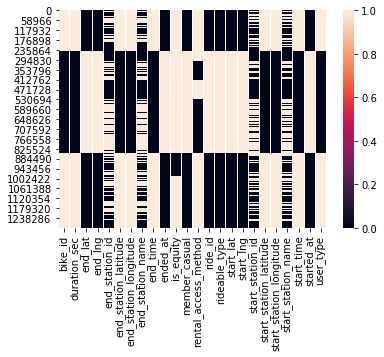

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isna().sum()

bike_id                     688091
duration_sec                688091
end_lat                     610191
end_lng                     610191
end_station_id              588409
end_station_latitude        688091
end_station_longitude       688091
end_station_name            587712
end_time                    688091
ended_at                    609153
is_equity                  1158993
member_casual               609153
rental_access_method        865132
ride_id                     609153
rideable_type               609153
start_lat                   609153
start_lng                   609153
start_station_id            578061
start_station_latitude      688091
start_station_longitude     688091
start_station_name          577408
start_time                  688091
started_at                  609153
user_type                   688091
dtype: int64

In [12]:
df.duplicated().sum()

7512

### Quality Issues

<ul>
    <li> Remove unwanted columns and missing values from the dataframe </li>
    <li> Seperating the date and time and gets stored in seperate columns for further computation </li>
    <li> Change the columns to its appropriate datatypes 
        <ul>
            <li>The Columns like Start_station_id, end_station_id, bike_id are in float data type, but it has to be in the type of string.</li>
            <li> Start_time and end_time are not in timestramp datatype </li>
            <li> User_type has to be converted to categorical datatype </li>
        </ul>
     </li>       
    <li> We can further enhance the dataset with more details about the time like month, day, hour, weekday</li>
    <li> The bike_id has decimal value and it has to be sliced out </li>
    
    
</ul>

### Data Cleaning

In [14]:
df_clean = df.copy()

#### Define

##### Remove unwanted columns and missing values from the dataframe

#### Code

In [15]:
df_clean.drop(columns=['end_lat', 'end_lng','ended_at', 'is_equity', 'member_casual','rental_access_method', 'ride_id', 'rideable_type', 'start_lat',
       'start_lng','started_at'],axis=0,inplace=True)

In [16]:
df_clean.dropna(inplace=True)

In [17]:
df_clean.drop_duplicates(inplace=True)

#### Test

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220740 entries, 242427 to 843379
Data columns (total 13 columns):
bike_id                    220740 non-null float64
duration_sec               220740 non-null float64
end_station_id             220740 non-null float64
end_station_latitude       220740 non-null float64
end_station_longitude      220740 non-null float64
end_station_name           220740 non-null object
end_time                   220740 non-null object
start_station_id           220740 non-null float64
start_station_latitude     220740 non-null float64
start_station_longitude    220740 non-null float64
start_station_name         220740 non-null object
start_time                 220740 non-null object
user_type                  220740 non-null object
dtypes: float64(8), object(5)
memory usage: 23.6+ MB


In [19]:
df_clean.duplicated().sum()

0

In [20]:
df_clean.isna().sum()

bike_id                    0
duration_sec               0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
end_station_name           0
end_time                   0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
start_station_name         0
start_time                 0
user_type                  0
dtype: int64

#### Define

##### Seperating the date and time and gets stored in seperate columns for further computation

#### Code

In [21]:
df_clean["startdate"] = df_clean.start_time.str.slice(0,10)
df_clean["starttime"]= df_clean.start_time.str.slice(10,22)
df_clean["enddate"] = df_clean.end_time.str.slice(0,10)
df_clean["endtime"]= df_clean.end_time.str.slice(10,22)

In [22]:
# Removing the columns start_time and end_time since it has no use further
df_clean.drop(columns=["start_time","end_time"],axis=0,inplace=True)

#### Test

In [23]:
df_clean.iloc[:,13:18].head(5)

,enddate,endtime
242427,2020-04-01,06:28:37.84
242428,2020-04-01,02:48:13.77
242429,2020-04-01,01:08:12.99
242430,2020-04-01,00:12:49.02
242431,2020-03-31,23:55:56.61


#### Define

##### Changing the columns to its  appropriate datatypes

#### Code

In [24]:
df_clean.startdate = pd.to_datetime(df_clean.startdate)
df_clean.enddate = pd.to_datetime(df_clean.enddate)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

In [25]:
df_clean.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [26]:
user_order = ['Customer', 'Subscriber']
userorder = pd.api.types.CategoricalDtype(user_order)
df_clean.user_type = df_clean.user_type.astype(userorder)

#### Test

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220740 entries, 242427 to 843379
Data columns (total 15 columns):
bike_id                    220740 non-null object
duration_sec               220740 non-null float64
end_station_id             220740 non-null object
end_station_latitude       220740 non-null float64
end_station_longitude      220740 non-null float64
end_station_name           220740 non-null object
start_station_id           220740 non-null object
start_station_latitude     220740 non-null float64
start_station_longitude    220740 non-null float64
start_station_name         220740 non-null object
user_type                  220740 non-null category
startdate                  220740 non-null datetime64[ns]
starttime                  220740 non-null object
enddate                    220740 non-null datetime64[ns]
endtime                    220740 non-null object
dtypes: category(1), datetime64[ns](2), float64(5), object(7)
memory usage: 25.5+ MB


#### Define

##### Enhance the dataset with more details about the time like month, day, hour, weekday

#### Code

In [28]:
df_clean["start_date"] = df_clean.startdate.dt.day
df_clean["start_month"] = df_clean.startdate.dt.month
df_clean["start_day"]=df_clean.startdate.dt.dayofweek
df_clean["start_year"]=df_clean.startdate.dt.year
df_clean["end_date"] = df_clean.enddate.dt.day
df_clean["end_month"] = df_clean.enddate.dt.month
df_clean["end_day"]=df_clean.enddate.dt.dayofweek
df_clean["end_year"]=df_clean.enddate.dt.year

In [29]:
day_map = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thrusday',4:'Friday',5:'Saturday',6:'Sunday'}
df_clean["start_day"] = df_clean.start_day.map(day_map)
df_clean.end_day = df_clean.end_day.map(day_map)

monthname = {1:'Jan',2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
df_clean.start_month = df_clean.start_month.map(monthname)
df_clean.end_month = df_clean.end_month.map(monthname)

df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)


df_clean["NumOfDays"] = df_clean.enddate - df_clean.startdate

In [30]:
df_clean["start_hour"] = df_clean.starttime.str.slice(1,3)
df_clean["end_hour"] = df_clean.endtime.str.slice(1,3)

#### Test

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220740 entries, 242427 to 843379
Data columns (total 27 columns):
bike_id                    220740 non-null object
duration_sec               220740 non-null float64
end_station_id             220740 non-null object
end_station_latitude       220740 non-null float64
end_station_longitude      220740 non-null float64
end_station_name           220740 non-null object
start_station_id           220740 non-null object
start_station_latitude     220740 non-null float64
start_station_longitude    220740 non-null float64
start_station_name         220740 non-null object
user_type                  220740 non-null category
startdate                  220740 non-null datetime64[ns]
starttime                  220740 non-null object
enddate                    220740 non-null datetime64[ns]
endtime                    220740 non-null object
start_date                 220740 non-null int64
start_month                220740 non-null object
start_day   

In [32]:
df_clean.iloc[:,15:27].head(5)

,start_date,start_month,start_day,start_year,end_date,end_month,end_day,end_year,duration_min,NumOfDays,start_hour,end_hour
242427,31,Mar,Tuesday,2020,1,Apr,Wednesday,2020,586,1 days,20,06
242428,31,Mar,Tuesday,2020,1,Apr,Wednesday,2020,242,1 days,22,02
242429,31,Mar,Tuesday,2020,1,Apr,Wednesday,2020,599,1 days,15,01
242430,31,Mar,Tuesday,2020,1,Apr,Wednesday,2020,17,1 days,23,00
242431,31,Mar,Tuesday,2020,31,Mar,Tuesday,2020,55,0 days,23,23


#### Define

##### The bike_id has decimal value and it has to be sliced out

#### Code

In [33]:
df_clean.bike_id=df_clean['bike_id'].str.split('.').str[0]

#### Test

In [34]:
df_clean.iloc[:,[0]].head(5)

,bike_id
242427,10982
242428,12617
242429,12812
242430,12955
242431,13050


#### Define

#### Correcting the spelling on Start_day column which holds wrong value

#### Code

In [36]:
df_clean.start_day.unique()

array(['Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Thrusday',
       'Wednesday'], dtype=object)

In [37]:
def changeday(day):
    if day == "Thrusday":
        return "Thursday"
    else:
        return day
df_clean.start_day = df_clean.start_day.apply(changeday)

#### Test

In [38]:
df_clean.start_day.unique()

array(['Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday',
       'Wednesday'], dtype=object)

In [39]:
# Reordering the dataframe
new_structure = ['bike_id','user_type','startdate', 'starttime', 
       'start_date', 'start_month', 'start_day', 'start_year','start_hour','enddate', 'endtime', 'end_date',
       'end_month', 'end_day', 'end_year','end_hour','NumOfDays','duration_min','duration_sec', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude']

df_clean = df_clean.reindex(columns=new_structure)

In [40]:
df_clean.head(5)

,bike_id,user_type,startdate,starttime,start_date,start_month,start_day,start_year,start_hour,enddate,...,duration_min,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
242427,10982,Customer,2020-03-31,20:42:10.07,31,Mar,Tuesday,2020,20,2020-04-01,...,586,35187.0,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428
242428,12617,Customer,2020-03-31,22:45:25.50,31,Mar,Tuesday,2020,22,2020-04-01,...,242,14568.0,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278
242429,12812,Customer,2020-03-31,15:08:22.33,31,Mar,Tuesday,2020,15,2020-04-01,...,599,35990.0,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315
242430,12955,Customer,2020-03-31,23:55:00.42,31,Mar,Tuesday,2020,23,2020-04-01,...,17,1068.0,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497
242431,13050,Customer,2020-03-31,23:00:55.64,31,Mar,Tuesday,2020,23,2020-03-31,...,55,3300.0,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428


### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in this dataset according to me is the start and end times of the ride taken i.e. month/weekday/hour/number of days rented. With this data, we can forecast the demand of the bikes. Apart from the wheather the users had any membership or they or casual users.

### Univariate Plots

In [41]:
base_color = sns.color_palette()[0]

##### FordGo bike usage by month 

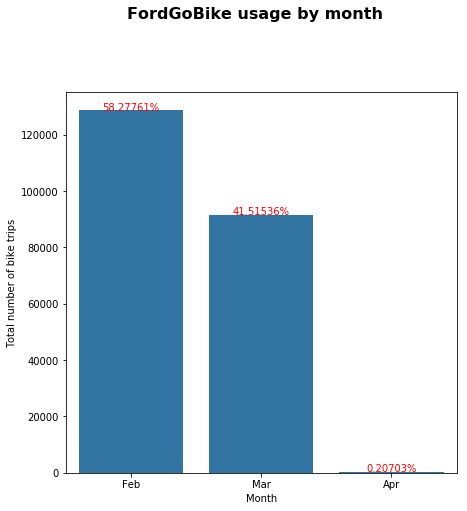

In [42]:
plt.figure(figsize=(7,7));
level_order = ["Feb","Mar","Apr"]
ordered_month = pd.api.types.CategoricalDtype(level_order);
df_clean["start_month"] = df_clean["start_month"].astype(ordered_month);
sns.countplot(data=df_clean,x="start_month",color=base_color);
plt.xlabel("Month");
plt.ylabel("Total number of bike trips");
plt.suptitle('FordGoBike usage by month',y=1.05,fontsize=16,fontweight='bold');
n_points= df_clean.shape[0]
cat_counts = df_clean.start_month.value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:1.5f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')

#### Observation

It is evident from the above graph that February is the month where there are more number of bikes has been rented for the year 2020 and April places the last position in the number of bikes rented. As per the wikipedia info San fransisco bay area is more  sunnier in february  when compared to normal summer months.

##### FordGo bike usage by day

In [43]:
df_clean.start_day.value_counts()

Tuesday      38599
Wednesday    37554
Monday       36152
Thursday     35609
Friday       32698
Saturday     20698
Sunday       19430
Name: start_day, dtype: int64

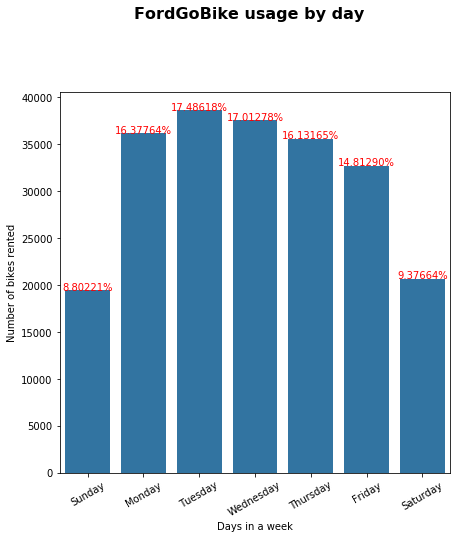

In [44]:
plt.figure(figsize=(7,7));
level_order1 = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
ordered_day = pd.api.types.CategoricalDtype(level_order1);
df_clean["start_day"] = df_clean["start_day"].astype(ordered_day);
sns.countplot(data=df_clean,x="start_day",color=base_color);
plt.xticks(rotation = 30);
plt.xlabel("Days in a week");
plt.ylabel("Number of bikes rented");
plt.suptitle('FordGoBike usage by day',y=1.05,fontsize=16,fontweight='bold');
n_points= df_clean.shape[0]
cat_counts = df_clean.start_day.value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:1.5f}%'.format(100*count/n_points)
    plt.text(loc, count-5, pct_string, ha = 'center', color = 'r')

#### Observation

It is conclusive from the graph that more number of bikes has been rented on week days than in week ends. There might be possibilities like most of the bikes has been rented by the office proffesional on week days and also it is clear from the wikipedia info that the wheather is good on these months which makes the office proffessinal to prefer bikes.

##### FordGo bike usage by hours

In [45]:
df_clean.start_hour.value_counts()

17    25326
08    24491
18    20389
09    18747
16    16573
19    12831
15    11610
07    11475
12    10849
13    10625
14    10348
10    10223
11     9877
20     7944
21     5475
06     4110
22     3744
23     2084
00     1169
05     1119
01      671
02      473
04      360
03      227
Name: start_hour, dtype: int64

In [46]:
df_clean.start_hour.unique()

array(['20', '22', '15', '23', '21', '19', '18', '17', '16', '14', '13',
       '12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '01',
       '00', '02'], dtype=object)

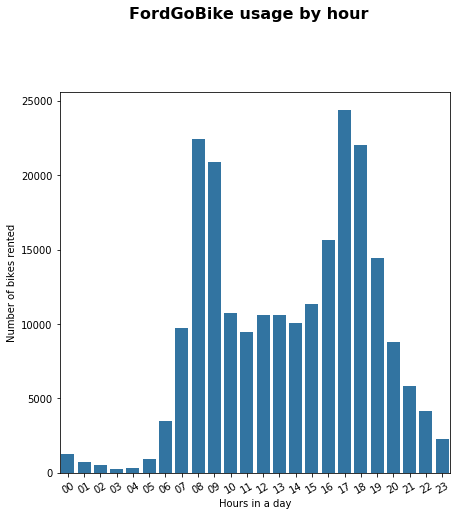

In [47]:
plt.figure(figsize=(7,7))
level_order3= ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
ordered_hour1 = pd.api.types.CategoricalDtype(level_order3);
df_clean["end_hour"] = df_clean["end_hour"].astype(ordered_hour1);
sns.countplot(data=df_clean,x="end_hour",color=base_color);
plt.xticks(rotation = 30);
plt.xlabel("Hours in a day");
plt.ylabel("Number of bikes rented");
plt.suptitle('FordGoBike usage by hour',y=1.05,fontsize=16,fontweight='bold');


#### Observation

From the above bar chart it is clear that bikes is rented by most people on morning 8 and 9 which indirectly implies that these are office startinng times. Apart from these two hours we can seen some clear spike on evening 5 and 6 PM this might be because of closing time of office. So the office proffessional rented the bikes gone some picknic with their families and had fun at late evening.

#### FordGoBike system trip duration in seconds.

In [48]:
df_clean.duration_sec.describe()

count    220740.000000
mean        852.974916
std        2038.373724
min          60.000000
25%         356.000000
50%         577.000000
75%         918.000000
max       86317.000000
Name: duration_sec, dtype: float64

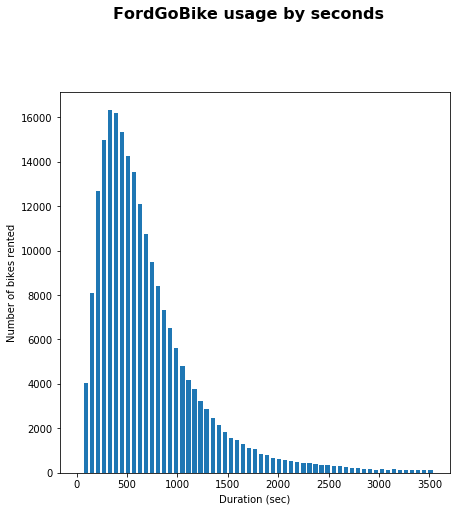

In [49]:
plt.figure(figsize=(7,7))
bin_edges = np.arange(0,3600,60)
plt.hist(data=df_clean,x="duration_sec",bins=bin_edges,rwidth=0.7);
plt.suptitle('FordGoBike usage by seconds',y=1.05,fontsize=16,fontweight='bold');
plt.xlabel("Duration (sec)")
plt.ylabel("Number of bikes rented");


#### Observation

 Looking at the histogram, we can see that trip durations are no longer than 30 min (1800 sec) and usually last 6 to 15 min.As it looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace.

 #### FordGoBike system trip duration in minutes

In [50]:
df_clean.duration_min.describe()

count    220740.000000
mean         13.725229
std          33.973066
min           1.000000
25%           5.000000
50%           9.000000
75%          15.000000
max        1438.000000
Name: duration_min, dtype: float64

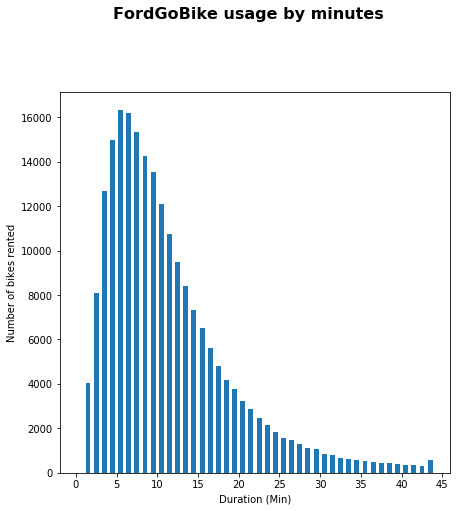

In [51]:
plt.figure(figsize=(7,7))
bin_edges = np.arange(0,45,1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data=df_clean,x="duration_min",bins=bin_edges,rwidth=0.6);
plt.suptitle('FordGoBike usage by minutes',y=1.05,fontsize=16,fontweight='bold');
plt.xlabel("Duration (Min)")
plt.ylabel("Number of bikes rented");
plt.xticks(ticks,labels);

#### Observation

As seen in the earlier visualization,the average trip is just under 13.75 minutes, with 75% of trips being around 15 minutes. Looking at the histogram, most rides fall in between the 3 - 11 minute range suggesting that people use the system for short commute travel.

### Bivariate plots

#### FordGo bike usage on every months categorized by its types of users

In [52]:
User_types = pd.DataFrame(df_clean.groupby(["start_month","user_type"])["user_type"].count().reset_index(name = "Group_Count"))
User_types

,start_month,user_type,Group_Count
0,Feb,Customer,112140
1,Feb,Subscriber,16502
2,Mar,Customer,63670
3,Mar,Subscriber,27971
4,Apr,Customer,55
5,Apr,Subscriber,402


### FordGoBike usage by month Vs User types using Bar Chart

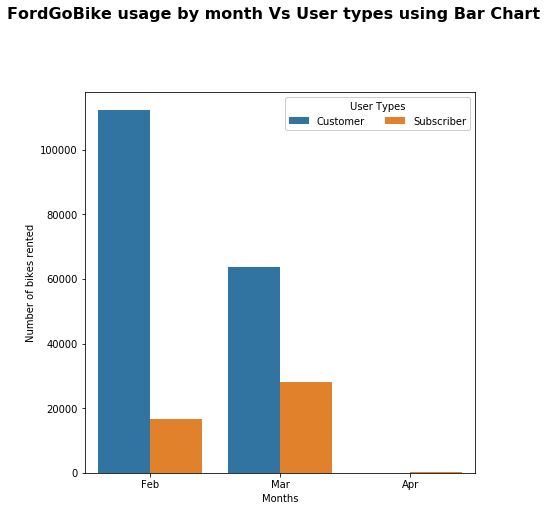

In [53]:
plt.figure(figsize=(7,7));
plt.suptitle('FordGoBike usage by month Vs User types using Bar Chart',y=1.05,fontsize=16,fontweight='bold');
sns.countplot(data=df_clean,x="start_month",hue="user_type");
plt.xlabel("Months");
plt.ylabel("Number of bikes rented");
plt.legend(loc = 0, ncol = 3, framealpha = 1, title = 'User Types');


### Observation

From the above bar chart there is no much Subscribers for the month February and March when compared to Customers. It indirectly implies there is no much cost saving if you been subscribed for the FordGo bikes.And for the month April there is more Subscribers then compared to Customers which implies FordGo bikes may launch any offer or discount schemes for the customers who subscribed for the fordgo bikes.

### FordGoBike usage by month Vs User types using Heat Map

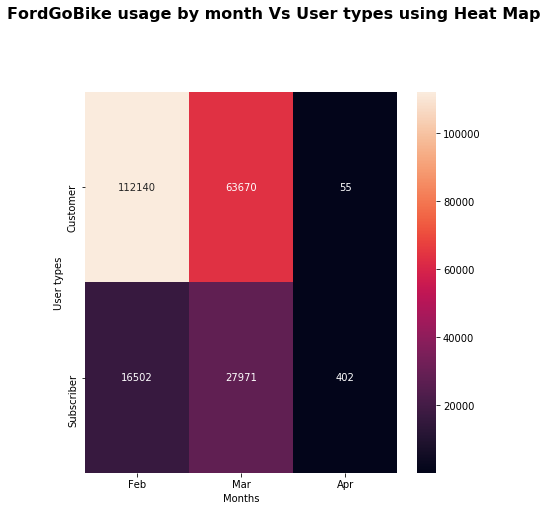

In [54]:
plt.figure(figsize=(7,7));
plt.suptitle('FordGoBike usage by month Vs User types using Heat Map',y=1.05,fontsize=16,fontweight='bold');
sns.heatmap(User_types.pivot(index="user_type",columns="start_month",values="Group_Count"),annot=True,fmt= 'd');
plt.xlabel("Months");
plt.ylabel("User types");

This heat map is the resemblence of the above bar chart and in the above heat map we can conclude that April is the only months where the subscribed customers rented the bikes more when compared to other months

### FordGoBike usage by minutes categorized by days

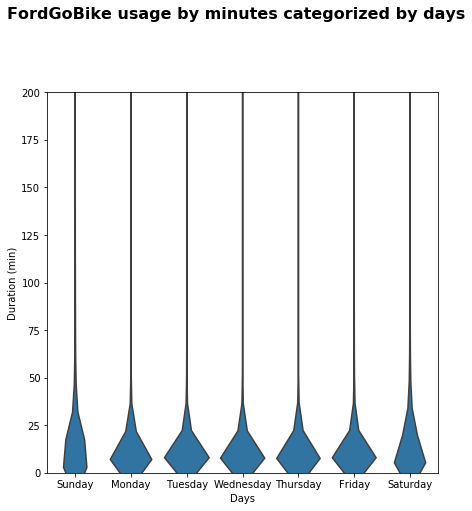

In [55]:
plt.figure(figsize=(7,7));
plt.ylim(0,200)
plt.suptitle('FordGoBike usage by minutes categorized by days',y=1.05,fontsize=16,fontweight='bold');
sns.violinplot(data = df_clean, x = 'start_day', y = 'duration_min',inner=None,color=base_color)
plt.xlabel("Days");
plt.ylabel("Duration (min)");

From the above violin plot, it is evident that all of the days has more number of rides with a maximum journey period around 1/2 hour.This can be clearly visualized from this violin plot distributions. From this violin plot we can see where the records has been distributed widely but for clear picture of these records I opt pointplot.

### Ford GoBike System Weekly Usage - Customers vs. Subscribers

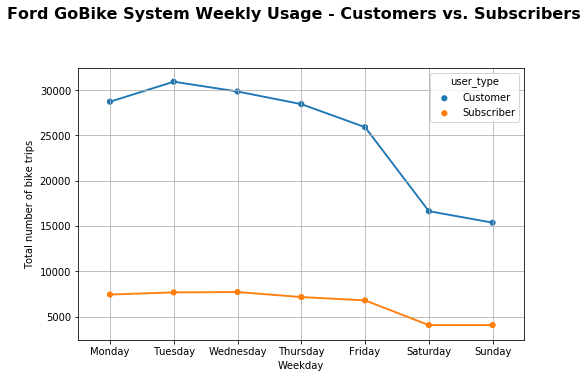

In [60]:
plt.figure(figsize=(8, 5))

df_clean_user_week = df_clean.groupby(['start_day', 'user_type']).size().reset_index()

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.pointplot(data=df_clean_user_week, x='start_day', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.suptitle('Ford GoBike System Weekly Usage - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
plt.xlabel('Weekday')
plt.ylabel('Total number of bike trips');
plt.grid()

From the above pointplot we can conclude that Week end has encounters some drop when compared to Week days. On week days Customer has more than 50% in number (bike rides) when compared to user type Subscribers.

### Ford GoBike System Weekly Usage - Customers vs. Subscribers

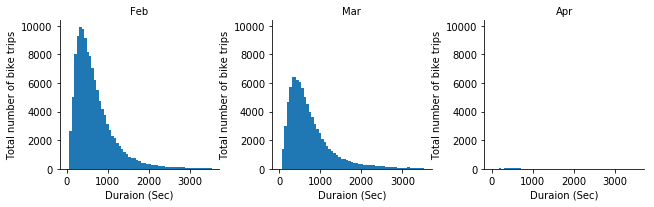

In [57]:
plt.figure(figsize=(10,10));
plt.suptitle('c',y=1.05,fontsize=16,fontweight='bold');
facet = sns.FacetGrid(data=df_clean,col='start_month');
bin_edges = np.arange(0,3600,60);
facet.map(plt.hist,"duration_sec",bins=bin_edges);
facet.set_titles('{col_name}');
facet.axes[0,0].set_xlabel('Duraion (Sec)');
facet.axes[0,1].set_xlabel('Duraion (Sec)');
facet.axes[0,2].set_xlabel('Duraion (Sec)');
facet.axes[0,0].set_ylabel('Total number of bike trips');
facet.axes[0,1].set_ylabel('Total number of bike trips');
facet.axes[0,2].set_ylabel('Total number of bike trips');

From the above facet grod histogram , we can conclude that february is the month where the bike has been rented for around 10000 seconds i,e) 166 minutes and this the top most time consumption ride when compared to all other rides irrespective of any months.

### Multivariate Exploration

### FordGoBike usage by minutes as per months - Customers Vs Subcribers

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


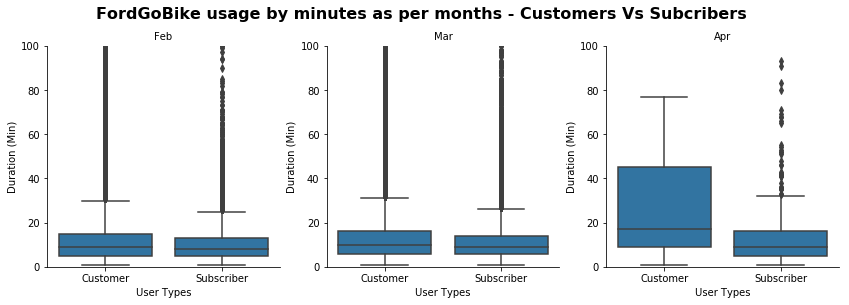

In [68]:
plt.figure(figsize=(10,10));

facet = sns.FacetGrid(data = df_clean, col = 'start_month', size = 4);
facet.map(sns.boxplot, 'user_type', 'duration_min');
plt.ylim(0,100);
plt.suptitle('FordGoBike usage by minutes as per months - Customers Vs Subcribers',y=1.05,fontsize=16,fontweight='bold');
facet.set_titles('{col_name}');
facet.axes[0,0].set_xlabel('User Types');
facet.axes[0,1].set_xlabel('User Types');
facet.axes[0,2].set_xlabel('User Types');
facet.axes[0,0].set_ylabel('Duration (Min)');
facet.axes[0,1].set_ylabel('Duration (Min)');
facet.axes[0,2].set_ylabel('Duration (Min)');

From the above box plot April is the month which holds very few number of records but it has the highest mean value in bike ride duration, All the three months has many number of outliers and many of its bike rides is distributed around less than 20 minutes for the month February and March, whereas for the month april it spikes around 45 minutes for the type customer and 20 minutes for the type subscribers.

### FordGoBike usage by minutes as per day - Customers Vs Subcribers

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


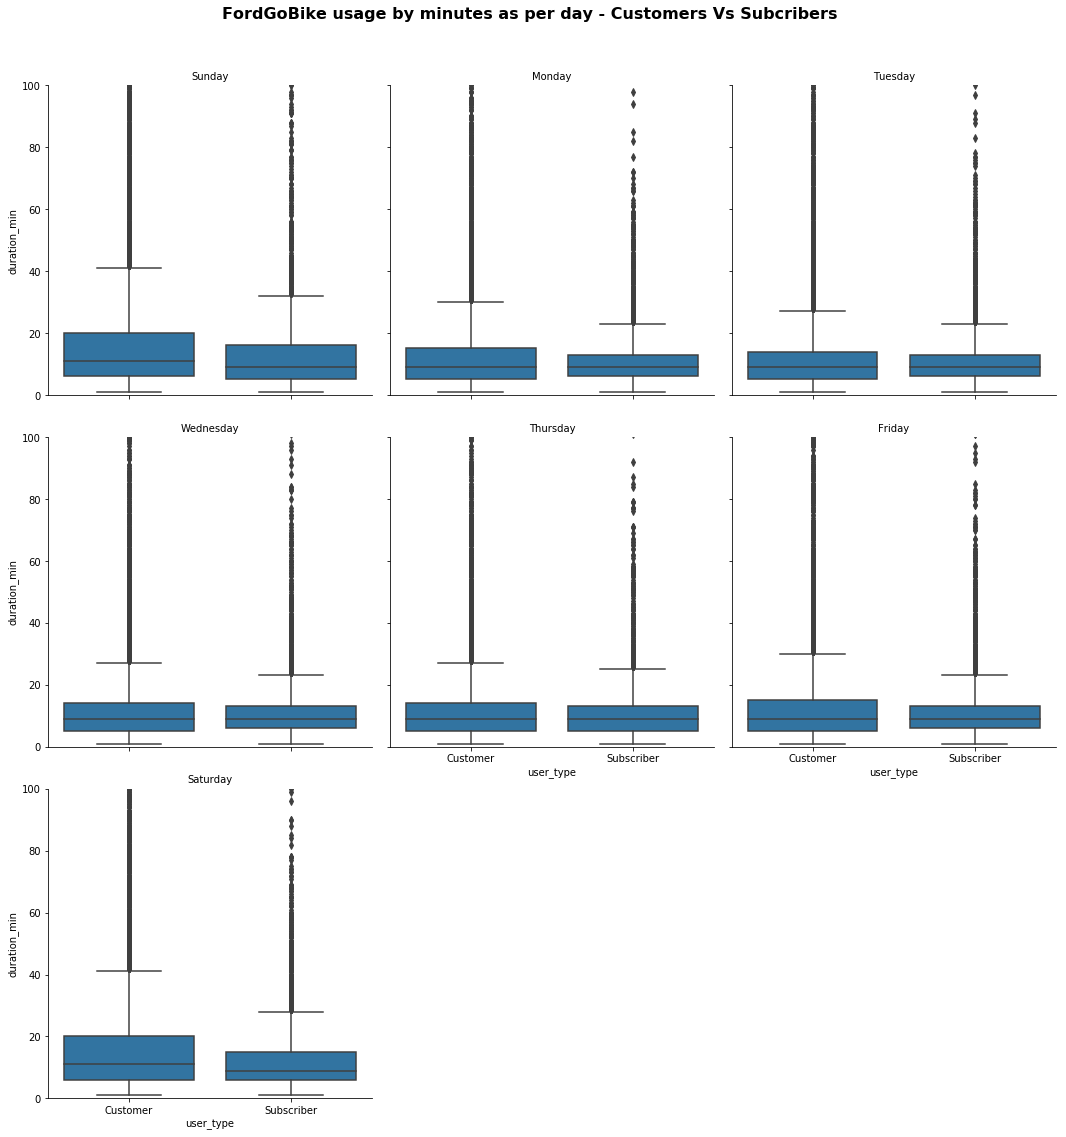

In [83]:
plt.figure(figsize=(10,10));

facet = sns.FacetGrid(data = df_clean, col = 'start_day', size = 5,col_wrap=3,margin_titles=True,sharex=True,sharey=True);
facet.map(sns.boxplot, 'user_type', 'duration_min');
plt.ylim(0,100);
plt.suptitle('FordGoBike usage by minutes as per day - Customers Vs Subcribers',y=1.05,fontsize=16,fontweight='bold');
facet.set_titles('{col_name}');


From the above facet box plot we can conclude that subscriber maintains its steadines among all the seven days, whereas the customers bikes rides minutes shown some small peak on week ends which shows they have rented the bikes for their personal purpose not for office commutes.